<a href="https://colab.research.google.com/github/Ahmedtarekpage/Auvtask1/blob/main/Image_Processing_(Ahmed_Tarek_Heba_Abdelkader_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VORTEX AUV Competiton 
# Project Number 1 
Image Processing (GATE)
Ahmed Tarek - Heba ABdelkader

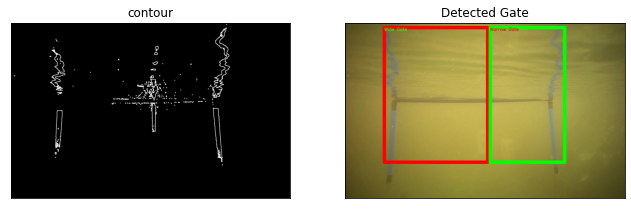

You got an output For Detected_Gate as an OUTPUT 'Detected_Gate.jpg' 


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter , ImageEnhance
import math
factor = 1.9 #Brightness Factor
img = cv2.imread('input.jpg') #Reading The Image  #path of The Image
im = Image.fromarray(np.uint8(img)) #Passing ndarray to Image.fromarray() to obtain PIL.Image
br_enhancer = ImageEnhance.Brightness(im) #Adjusting Brightness
im_output = br_enhancer.enhance(factor)#Adjusting Brightness
co_enhancer = ImageEnhance.Contrast(im_output)# enhancer for adjusting contrast
factor = 1.5 #increase constrast
im_output = co_enhancer.enhance(factor)# enhancer for adjusting sharpening
sh_enhancer = ImageEnhance.Sharpness(im_output) #adjusting sharpening
factor = 5 #increase  sharpness
im_output = sh_enhancer.enhance(factor)#increase  sharpness
processed_image =  np.asarray(im_output)
r, g, b = cv2.split(processed_image) # splitting the image into different channels  #b is the best choice for underwater images
_ , img_binary = cv2.threshold(b,150, 255, cv2.THRESH_BINARY) #converting the pixels with values between 150 to 255 to white color
new_image = cv2.medianBlur(img_binary, 3)# using median filter
edges = cv2.Canny(new_image,10,10) # applying canny edges
edges = cv2.dilate(edges, None)
contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #Detection Contors and hierarchy
circles = []
min_x = 0
min_y = 0
max_x = 0
max_y = 0

for iteration, contour in enumerate(contours):  # Find bounding rectangles
    area = cv2.contourArea(contour)
    if  area > 50 and area < 99999999999:
      x,y,w,h = cv2.boundingRect(contour)

      if (min_x == 0 and min_y == 0 and max_x == 0 and max_y == 0 ):
        min_x = x
        min_y = y
        max_x = x + w
        max_y = y + h
      if min_x > x:
        min_x = x
      if min_y > y:
        min_y = y
      if max_x < ( x + w ):
        max_x = x + w
      if max_y < ( y + h ):
        max_y = y + h

mid_min_y = min_y
mid_max_y = max_y
width_thrid = (max_x - min_x)/3
idx1 = min_x + width_thrid
idx2 = max_x - width_thrid
mid_min_x = min_x
mid_max_x = max_x
for iteration, contour in enumerate(contours):# Find bounding rectangles
    x,y,w,h = cv2.boundingRect(contour)
    if x > idx1 and x < idx2:
      if mid_min_y < y:
        mid_min_y = y
        mid_min_x = x
      if mid_max_y > ( y + h ):
        mid_max_y = y + h
        mid_max_x = x
cv2.rectangle(img,(int(min_x),int(min_y)),(int(mid_min_x),int(max(max_y,mid_max_y))),(255,0,0),20)

p1=[int(min_x),int(min_y)]
p2=[mid_max_x,mid_max_y]
gate1_width = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
p1=[mid_min_x,mid_min_y]
p2=[int(max_x),int(max_y)]
gate2_width = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
if (gate1_width > gate2_width):
    cv2.putText(img, 'Wide Gate', (int(min_x),int(min_y)+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.rectangle(img,(int(mid_max_x),int(min(mid_min_y,min_y))),(int(max_x),int(max_y)),(0,255,0),20)
    cv2.putText(img, 'Narrow Gate', (int(mid_max_x),int(min(mid_min_y,min_y)+20)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
else:
    cv2.putText(img, 'Narrow Gate', (int(min_x),int(min_y)+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.rectangle(img,(int(mid_max_x),int(min(mid_min_y,min_y))),(int(max_x),int(max_y)),(0,255,0),20)
    cv2.putText(img, 'Wide Gate', (int(mid_max_x),int(min(mid_min_y,min_y)+20)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(edges, cmap = 'gray'),plt.title('contour')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img),plt.title('Detected Gate')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Detected_Gates.jpg",img)

print("You got an output For Detected_Gate as an OUTPUT 'Detected_Gate.jpg' ")
#if it's Working on IDE
#cv2.imshow("Edges",edges)
#cv2.imshow("Detected Gates",img)
#cv2.waitKey()

## Bouns
# Detecting Gates from videos

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter , ImageEnhance
import math
cap = cv2.VideoCapture('tues_6.mp4')

# Get the Default resolutions
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and filename.

while (cap.isOpened()):
    ret, img = cap.read()
    factor = 1.9 #Brightness Factor
    im = Image.fromarray(np.uint8(img)) #Passing ndarray to Image.fromarray() to obtain PIL.Image
    br_enhancer = ImageEnhance.Brightness(im) #Adjusting Brightness
    im_output = br_enhancer.enhance(factor)#Adjusting Brightness
    co_enhancer = ImageEnhance.Contrast(im_output)# enhancer for adjusting contrast
    factor = 1.5 #increase constrast
    im_output = co_enhancer.enhance(factor)# enhancer for adjusting sharpening
    sh_enhancer = ImageEnhance.Sharpness(im_output) #adjusting sharpening
    factor = 5 #increase  sharpness
    im_output = sh_enhancer.enhance(factor)#increase  sharpness
    processed_image =  np.asarray(im_output)
    r, g, b = cv2.split(processed_image) # splitting the image into different channels  #b is the best choice for underwater images
    _ , img_binary = cv2.threshold(b,150, 255, cv2.THRESH_BINARY) #converting the pixels with values between 150 to 255 to white color
    new_image = cv2.medianBlur(img_binary, 3)# using median filter
    edges = cv2.Canny(new_image,10,10) # applying canny edges
    edges = cv2.dilate(edges, None)
    contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #Detection Contors and hierarchy
    circles = []
    min_x = 0
    min_y = 0
    max_x = 0
    max_y = 0
    for iteration, contour in enumerate(contours):  # Find bounding rectangles
        area = cv2.contourArea(contour)
        if  area > 50 and area < 99999999999:
          x,y,w,h = cv2.boundingRect(contour)

          if (min_x == 0 and min_y == 0 and max_x == 0 and max_y == 0 ):
            min_x = x
            min_y = y
            max_x = x + w
            max_y = y + h
          if min_x > x:
            min_x = x
          if min_y > y:
            min_y = y
          if max_x < ( x + w ):
            max_x = x + w
          if max_y < ( y + h ):
            max_y = y + h

    mid_min_y = min_y
    mid_max_y = max_y
    width_thrid = (max_x - min_x)/3
    idx1 = min_x + width_thrid
    idx2 = max_x - width_thrid
    mid_min_x = min_x
    mid_max_x = max_x
    for iteration, contour in enumerate(contours):# Find bounding rectangles
        x,y,w,h = cv2.boundingRect(contour)
        if x > idx1 and x < idx2:
          if mid_min_y < y:
            mid_min_y = y
            mid_min_x = x
          if mid_max_y > ( y + h ):
            mid_max_y = y + h
            mid_max_x = x
    cv2.rectangle(img,(int(min_x),int(min_y)),(int(mid_min_x),int(max(max_y,mid_max_y))),(255,0,0),20)

    p1=[int(min_x),int(min_y)]
    p2=[mid_max_x,mid_max_y]
    gate1_width = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    p1=[mid_min_x,mid_min_y]
    p2=[int(max_x),int(max_y)]
    gate2_width = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    if (gate1_width > gate2_width):
        cv2.putText(img, 'Wide Gate', (int(min_x),int(min_y)+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(img,(int(mid_max_x),int(min(mid_min_y,min_y))),(int(max_x),int(max_y)),(0,255,0),20)
        cv2.putText(img, 'Narrow Gate', (int(mid_max_x),int(min(mid_min_y,min_y)+20)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
    else:
        cv2.putText(img, 'Narrow Gate', (int(min_x),int(min_y)+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(img,(int(mid_max_x),int(min(mid_min_y,min_y))),(int(max_x),int(max_y)),(0,255,0),20)
        cv2.putText(img, 'Wide Gate', (int(mid_max_x),int(min(mid_min_y,min_y)+20)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
    cv2.imshow("Detected Gates",img)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

